In [19]:
import numpy as np
import torch
import matplotlib.pylab as pl
import proplot as plot
plot.rc['figure.facecolor'] = "white"

In [20]:
import sys
sys.path.append('../code/')

In [21]:
from generate_data import make_data

In [275]:
xs=torch.tensor([[ 2,  3],
         [ 1.2323, -0.5437],
         [-1.2,  -1.3],
         [-4.6173,  4.9280],
         [-4.2, -0.8104],
         ])
xt=torch.tensor([[ 5,  0.6922],
         [ .5,  0.5188],
         [-0.7680, -0.2880],
         [-2.6556, -0.9959],
         [-4.8, -1.2837]])

In [276]:

theta=torch.tensor([.8,.3])
theta/=torch.norm(theta)

xs_p=xs@theta
xs_p=xs_p[:,None]*theta[None,:]

xt=xt@theta
xt=xt[:,None]*theta[None,:]

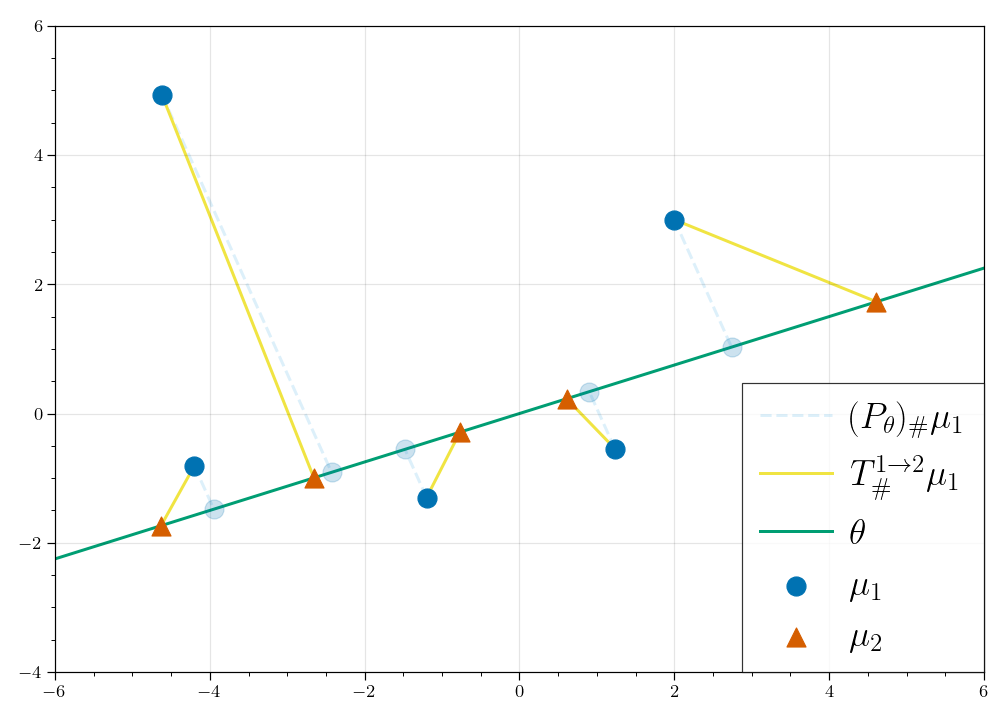

In [286]:
pl.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
s=90
pl.figure(figsize=(7,5))
for i in range(xs.shape[0]-1):
    pl.plot([xs[i, 0], xs_p[i, 0]], [xs[i, 1], xs_p[i, 1]],c='C5',alpha=0.2,linestyle='dashed',zorder=1)
    pl.plot([xs[i, 0], xt[i, 0]], [xs[i, 1], xt[i, 1]],c='C4',alpha=1,zorder=1)
    
pl.plot([xs[4, 0], xs_p[4, 0]], [xs[4, 1], xs_p[4, 1]],c='C5',alpha=0.2,linestyle='dashed',label=r'$(P_\theta)_\#\mu_1$',zorder=1)
pl.plot([xs[4, 0], xt[4, 0]], [xs[4, 1], xt[4, 1]],c='C4',alpha=1,label=r'$T^{1\to 2}_\#\mu_1$',zorder=1)    
pl.axline((0,0), [theta[0],theta[1]], color='C2',label=r'$\theta$',zorder=1)

pl.scatter(xs[:, 0], xs[:, 1], c='C0', label='$\mu_1$',alpha=1,zorder=2,s=s)
pl.scatter(xt[:, 0], xt[:, 1], c='C1', label='$\mu_2$',alpha=1,marker="^",zorder=2,s=s)
pl.scatter(xs_p[:, 0], xs_p[:, 1], c='C0',alpha=.2,zorder=2,s=s)

pl.xlim(-6,6)
pl.ylim(-4,6)
pl.legend(fontsize=18)
pl.tight_layout()
pl.savefig("closed_form.pdf",bbox_inches='tight')